In [2]:
from aind_hcr_data_loader.hcr_dataset import create_hcr_dataset_from_config, HCRDataset
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# notebook reload
%load_ext autoreload
%autoreload 2

# Create HCRDataset
+ Have all datasets of interest attached to `"..\data"`
+ Specify path to config_file

In [3]:
data_dir = Path("/root/capsule/data")
config_path = "/src/aind-hcr-data-loader/src/aind_hcr_data_loader/examples/mouse_config_example.json"

mouse_id = "747667" # must be in config file
dataset = create_hcr_dataset_from_config(mouse_id,
                                         data_dir=data_dir,
                                         config_path=config_path)

Could not load metadata for mouse 747667


In [4]:
print(dataset)

HCRDataset(mouse_id='747667', rounds=['R1', 'R2', 'R3', 'R4', 'R5'], total_channels=29)


In [5]:
dataset.summary()

HCR Dataset Summary
Mouse ID: 747667
Rounds: R1, R2, R3, R4, R5

Channels by round:
  R1: 405, 488, 561, 514, 594
  R2: 561, 594, 405, 514, 638, 488
  R3: 405, 594, 638, 561, 488, 514
  R4: 405, 594, 561, 638, 488, 514
  R5: 488, 405, 514, 638, 594, 561

Segmentation files by round:
  R1: resolutions 0, 2, centroids: ✓
  R2: resolutions 0, 2, centroids: ✗
  R3: resolutions 0, 2, centroids: ✗
  R4: resolutions 0, 2, centroids: ✗
  R5: resolutions 0, 2, centroids: ✗

Spot detection files by round:
  R1: channels 514, 561, 488
    514: spots ✓, stats files: 3
    561: spots ✓, stats files: 3
    488: spots ✓, stats files: 3
  R2: channels 488, 514, 561, 594, 638
    488: spots ✓, stats files: 5
    514: spots ✓, stats files: 5
    561: spots ✓, stats files: 5
    594: spots ✓, stats files: 5
    638: spots ✓, stats files: 5
  R3: channels 514, 594, 638, 561, 488
    514: spots ✓, stats files: 5
    594: spots ✓, stats files: 5
    514: spots ✓, stats files: 5
    561: spots ✓, stats files

In [14]:
# where all rounds stored
dataset.rounds

{'R1': HCRRound(round_key='R1', channels=['514', '561', '405', '488', '594'], segmentation_resolutions=['0', '2']),
 'R2': HCRRound(round_key='R2', channels=['638', '561', '405', '514', '594', '488'], segmentation_resolutions=['0', '2']),
 'R3': HCRRound(round_key='R3', channels=['405', '488', '514', '594', '561', '638'], segmentation_resolutions=['0', '2']),
 'R4': HCRRound(round_key='R4', channels=['514', '594', '405', '488', '638', '561'], segmentation_resolutions=['0', '2']),
 'R5': HCRRound(round_key='R5', channels=['488', '594', '514', '405', '561', '638'], segmentation_resolutions=['0', '2'])}

In [5]:
# Check available attributes and methods (cleaned up - no dunder methods)
round_dir = dir(dataset.rounds["R1"])
print(f"HCRRound attributes and methods ({len(round_dir)} items):")
round_dir

HCRRound attributes and methods (13 items):


['get_cell_info',
 'get_channels',
 'get_segmentation_resolutions',
 'has_channel',
 'load_cell_centroids',
 'load_segmentation_mask',
 'load_zarr_channel',
 'processing_manifest',
 'round_key',
 'segmentation_files',
 'spot_detection_files',
 'spot_files',
 'zarr_files']

In [6]:
# Check dataset attributes and methods
dataset_dir = dir(dataset)
print(f"HCRDataset attributes and methods ({len(dataset_dir)} items):")
dataset_dir

HCRDataset attributes and methods (15 items):


['create_cell_gene_matrix',
 'create_channel_gene_table',
 'dataset_names',
 'get_cell_info',
 'get_channels',
 'get_rounds',
 'get_segmentation_resolutions',
 'has_round',
 'load_cell_centroids',
 'load_segmentation_mask',
 'load_zarr_channel',
 'metadata',
 'mouse_id',
 'rounds',
 'summary']

In [4]:
# processing manifest
dataset.rounds["R1"].processing_manifest

{'segmentation_channels': {'background': '405', 'nuclear': '594'},
 'spot_channels': ['488', '514', '561'],
 'round': 1,
 'stitching_channels': ['488', '514', '561'],
 'gene_dict': {'405': {'gene': 'Rn28s',
   'barcode': '',
   'fluorophore': '',
   'wavelength': 'dtype:',
   'round': 1},
  '488': {'gene': 'GFP',
   'barcode': 'B1',
   'fluorophore': '',
   'wavelength': '488,',
   'round': 1},
  '514': {'gene': 'Slc17a7',
   'barcode': 'B2',
   'fluorophore': '',
   'wavelength': '514,',
   'round': 1},
  '561': {'gene': 'Gad2',
   'barcode': 'B3',
   'fluorophore': '',
   'wavelength': '561,',
   'round': 1},
  '594': {'gene': 'Syto59',
   'barcode': '',
   'fluorophore': '',
   'wavelength': 'dtype:',
   'round': 1}},
 'tile_subset': ['Tile_X_0002_Y_0002_Z_0000_ch_405.zarr',
  'Tile_X_0002_Y_0003_Z_0000_ch_405.zarr',
  'Tile_X_0002_Y_0004_Z_0000_ch_405.zarr',
  'Tile_X_0003_Y_0002_Z_0000_ch_405.zarr',
  'Tile_X_0003_Y_0003_Z_0000_ch_405.zarr',
  'Tile_X_0003_Y_0004_Z_0000_ch_405.zar

# All rounds cell x gene

In [7]:
# Create cell-gene matrix from all rounds
# Note: This will print genes found in each round and identify any duplicates
cxg = dataset.create_cell_gene_matrix(unmixed=True)

Round R1 has these genes: ['Gad2' 'GFP' 'Slc17a7']
Round R2 has these genes: ['Ndnf' 'Sncg' 'Cck' 'Calb2' 'Vip']
Round R3 has these genes: ['Calb1' 'Tac2' 'Reln' 'Tac1' 'Npy']
Round R4 has these genes: ['Crh' 'Sst' 'Penk' 'Pvalb' 'Ptprt']
Round R5 has these genes: ['Nos1' 'Kirrel3' 'Pvalb' 'Pdyn' 'Sncg']
Gene 'Pvalb' appears in rounds: R4, R5
Gene 'Sncg' appears in rounds: R2, R5
Total duplicate genes found: 2


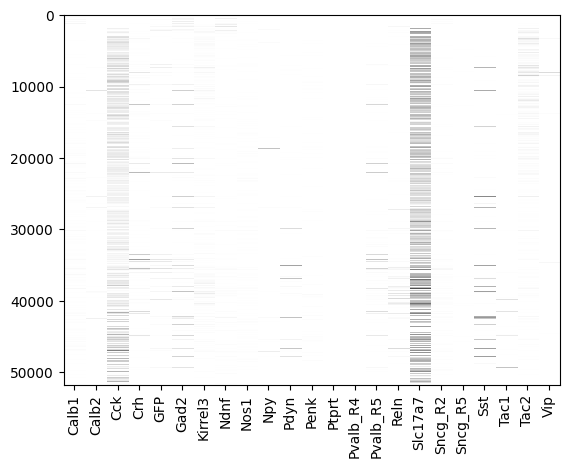

In [9]:
# invert colormap 
plt.imshow(cxg, aspect='auto', cmap='gray_r', interpolation='none')
# add gene names from dataframe
#plt.yticks(ticks=range(len(cxg.index)), labels=cxg.index)
plt.xticks(ticks=range(len(cxg.columns)), labels=cxg.columns, rotation=90)
plt.show()


In [10]:
# Create cell-gene matrix using mixed (not unmixed) data
cxg_mixed = dataset.create_cell_gene_matrix(unmixed=False)

Round R1 has these genes: ['Gad2' 'Slc17a7' 'GFP']
Round R2 has these genes: ['Calb2' 'Cck' 'Ndnf' 'Sncg' 'Vip']
Round R3 has these genes: ['Calb1' 'Reln' 'Tac1' 'Tac2' 'Npy']
Round R4 has these genes: ['Crh' 'Penk' 'Ptprt' 'Pvalb' 'Sst']
Round R5 has these genes: ['Kirrel3' 'Nos1' 'Pdyn' 'Pvalb' 'Sncg']
Gene 'Pvalb' appears in rounds: R4, R5
Gene 'Sncg' appears in rounds: R2, R5
Total duplicate genes found: 2


# Cell info per round

In [9]:
dataset.get_cell_info(round_key="R1")

,cell_id,volume,x_centroid,y_centroid,z_centroid
0,1,99056.0,96,204,391
2,2,126640.0,138,932,394
5,3,176640.0,260,888,402
7,4,10816.0,456,816,400
8,5,263024.0,400,732,404
...,...,...,...,...,...
39823,23916,53088.0,5366,1546,1390
39824,23918,124320.0,5306,1266,1389
39825,23921,43072.0,5502,2682,1391
39826,23927,6720.0,5438,3180,1394
